##***Rdkit will allow us to compute the molecular descriptors for the compounds***

***PaDEL_Descriptor***

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-09-26 10:33:50--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-09-26 10:33:50--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   111MB/s    in 0.2s    

2024-09-26 10:33:51 (111 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-09-26 10:33:51--  https://github

In [4]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('Data_LogP_filtered.csv')
df

,mol_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL290698,O=P(O)(O)CN[C@@H](Cc1ccc(-c2ccccc2)cc1)c1nn[nH]n1,active,359.326,1.8753,4.0,5.0,9.045757
1,CHEMBL273748,CC(c1ccccc1)C(CS)C(=O)NCC(=O)O,active,267.350,1.5369,3.0,3.0,8.886057
2,CHEMBL273898,CC(C)CC(NC(=O)C(CS)C(C)c1ccccc1)C(=O)O,active,323.458,2.9516,3.0,3.0,8.455932
3,CHEMBL37861,O=C(NCc1ccccc1)[C@H](CC#Cc1ccccc1F)NCP(=O)(O)O,inactive,390.351,1.9771,4.0,3.0,4.259637
4,CHEMBL290332,O=C(NCCCc1ccccc1)[C@H](CC#Cc1ccc(F)cc1F)NCP(=O...,active,436.395,2.5488,4.0,3.0,6.193820
...,...,...,...,...,...,...,...,...
153,CHEMBL51576,O=C(O)CN1Cc2ccccc2C[C@H](NC(=O)[C@@H](S)Cc2ccc...,active,398.484,1.6818,3.0,4.0,6.756962
154,CHEMBL299639,O=C(O)CN1C(=O)[C@@H](NC(=O)[C@@H](S)Cc2ccccc2)...,active,398.484,2.0763,3.0,4.0,8.214670
155,CHEMBL287896,C[C@H](NC(=O)[C@@H](S)Cc1ccccc1)C(=O)N1CCC[C@H...,active,350.440,1.1078,3.0,4.0,6.397940
156,CHEMBL49920,C[C@H](NC(=O)[C@@H](CS)Cc1ccccc1)C(=O)N1Cc2ccc...,active,426.538,2.3179,3.0,4.0,8.408935


In [7]:
select = ['canonical_smiles','mol_chembl_id']
df_selection = df[select]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)


In [8]:
df_selection.head()

,canonical_smiles,mol_chembl_id
0,O=P(O)(O)CN[C@@H](Cc1ccc(-c2ccccc2)cc1)c1nn[nH]n1,CHEMBL290698
1,CC(c1ccccc1)C(CS)C(=O)NCC(=O)O,CHEMBL273748
2,CC(C)CC(NC(=O)C(CS)C(C)c1ccccc1)C(=O)O,CHEMBL273898
3,O=C(NCc1ccccc1)[C@H](CC#Cc1ccccc1F)NCP(=O)(O)O,CHEMBL37861
4,O=C(NCCCc1ccccc1)[C@H](CC#Cc1ccc(F)cc1F)NCP(=O...,CHEMBL290332


In [9]:
print(len(df_selection))

158


***Calculate PaDEL Descriptors***

In [10]:
! bash padel.sh

Processing CHEMBL273748 in molecule.smi (2/158). 
Processing CHEMBL290698 in molecule.smi (1/158). 
Processing CHEMBL273898 in molecule.smi (3/158). Average speed: 2.81 s/mol.
Processing CHEMBL37861 in molecule.smi (4/158). Average speed: 1.92 s/mol.
Processing CHEMBL290332 in molecule.smi (5/158). Average speed: 1.40 s/mol.
Processing CHEMBL276008 in molecule.smi (6/158). Average speed: 1.41 s/mol.
Processing CHEMBL11806 in molecule.smi (7/158). Average speed: 1.23 s/mol.
Processing CHEMBL290304 in molecule.smi (8/158). Average speed: 1.09 s/mol.
Processing CHEMBL11616 in molecule.smi (9/158). Average speed: 1.09 s/mol.
Processing CHEMBL6915 in molecule.smi (10/158). Average speed: 0.99 s/mol.
Processing CHEMBL446393 in molecule.smi (11/158). Average speed: 0.95 s/mol.
Processing CHEMBL11620 in molecule.smi (12/158). Average speed: 0.88 s/mol.
Processing CHEMBL287971 in molecule.smi (13/158). Average speed: 0.84 s/mol.
Processing CHEMBL416234 in molecule.smi (14/158). Average speed: 0

In [11]:
df2 = pd.read_csv('descriptors_output.csv')
df2

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL273748,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL290698,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL273898,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL37861,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL290332,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,CHEMBL51576,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,CHEMBL299639,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,CHEMBL287896,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,CHEMBL49920,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***Preparing X and Y Data Matrices***

**X data matrix**

In [12]:
df_x = pd.read_csv('descriptors_output.csv')
df_x

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL273748,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL290698,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL273898,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL37861,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL290332,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,CHEMBL51576,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,CHEMBL299639,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,CHEMBL287896,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,CHEMBL49920,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_x = df_x.drop(columns=['Name'])
df_x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
155,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
156,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**Y data matrix**

In [14]:
df_y = df['pIC50']
df_y

,pIC50
0,9.045757
1,8.886057
2,8.455932
3,4.259637
4,6.193820
...,...
153,6.756962
154,8.214670
155,6.397940
156,8.408935


**Combining X and Y variable**

In [15]:
datatset = pd.concat([df_x,df_y], axis=1)
datatset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.045757
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.886057
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.455932
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.259637
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.193820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.756962
154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.214670
155,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.397940
156,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.408935


In [16]:
datatset.to_csv('Neprilysin_bioactivity_data_2class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
! cp Neprilysin_bioactivity_data_2class_pIC50_pubchem_fp.csv "/content/drive/My Drive/Colab Notebooks/skin"

***Input features***

In [17]:
x = datatset.drop('pIC50', axis=1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
155,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
156,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y = df.pIC50
y

,pIC50
0,9.045757
1,8.886057
2,8.455932
3,4.259637
4,6.193820
...,...
153,6.756962
154,8.214670
155,6.397940
156,8.408935


***Remove low variance features***

In [19]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
x = selection.fit_transform(x)

In [20]:
x.shape

(158, 55)

***Data split (80/20)***

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
x_test.shape, y_test.shape, x_train.shape, y_train.shape

((32, 55), (32,), (126, 55), (126,))

**Building regression model**

In [33]:
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
r2 = model.score(x_test, y_test)
r2

0.4527896026969911

In [26]:
y_pred = model.predict(x_test)

***Scatter plot***

<function matplotlib.pyplot.show(close=None, block=None)>

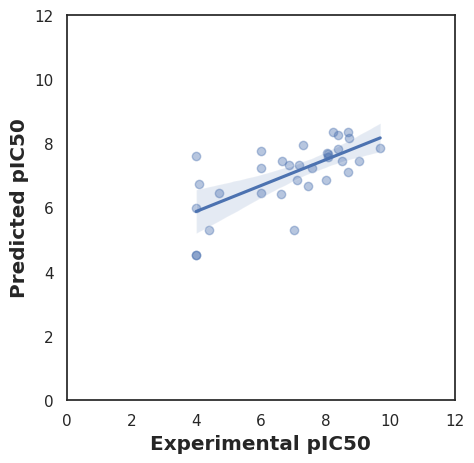

In [35]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show